In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)

In [2]:
import os
import torch
def get_baseline_gaussian(dir):
    checkpoint_path = os.path.join(dir, "checkpoints/best_valid.pt")
    checkpoint_state_dict = torch.load(checkpoint_path)["module_state_dict"]
    mean_key = "prior.prior.prior.prior.prior.prior.prior.prior.bijection.shift"
    log_stddev_key = "prior.prior.prior.prior.prior.prior.prior.prior.bijection.log_scale"
    return checkpoint_state_dict[mean_key], torch.exp(checkpoint_state_dict[log_stddev_key])

In [4]:
# NOTE: Two things
#   1. Replace `ml_run_name` and `ts_run_name` with the relevant run directories
#   2. Ensure to run ./main.py --resume <run_name> --test before running this script,
#      with <run_name> replaced by either `ml_run_name` or `ts_run_name`.

ml_run_name = "runs/us/Oct06_22-18-34"
ml_pullback = np.load(ml_run_name + "/pullback.npy")
ml_kde = np.load(ml_run_name + "/kde.npy")

ts_run_name = "runs/baseline/Oct06_22-34-11"
ts_pullback = np.load(ts_run_name + "/pullback.npy")
ts_kde = np.load(ts_run_name + "/kde.npy")
ts_gaussian_params = np.array([get_baseline_gaussian(ts_run_name)[0].detach().numpy(),
                               get_baseline_gaussian(ts_run_name)[1].detach().numpy()]).reshape(-1)

In [19]:
# xs = np.linspace(-3, 3, 1000)
# ml_gaussian = norm.pdf(xs)
# ts_gaussian = norm.pdf(xs, ts_gaussian_params[0], ts_gaussian_params[1])

# fig, ax = plt.subplots(1, 1)

# plt.plot(ml_pullback[0], ml_pullback[1], c='g', alpha=0.3, label='RNFs-ML (exact) target')
# plt.plot(xs, ml_gaussian, c='g', label='RNFs-ML (exact) learned')

# plt.plot(ts_pullback[0], ts_pullback[1], c='r', alpha=0.3, label='RNFs-TS target')
# plt.plot(xs, ts_gaussian, c='r', label='RNFs-TS learned')

# ax.set_xlabel(r'$z$', fontsize=15)
# ax.set_ylabel(r'$\log p(z)$', fontsize=15)


# plt.legend(loc=1, fontsize=12)

# plt.tight_layout()

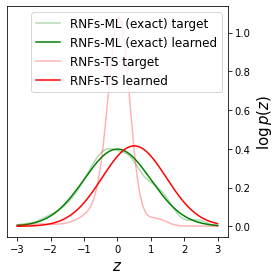

In [5]:
xs = np.linspace(-3, 3, 1000)
ml_gaussian = norm.pdf(xs)
ts_gaussian = norm.pdf(xs, ts_gaussian_params[0], ts_gaussian_params[1])

fig, ax = plt.subplots(1, 1)

plt.plot(ml_kde[0], ml_kde[1], c='g', alpha=0.3, label='RNFs-ML (exact) target')
plt.plot(xs, ml_gaussian, c='g', label='RNFs-ML (exact) learned')

plt.plot(ts_kde[0], ts_kde[1], c='r', alpha=0.3, label='RNFs-TS target')
plt.plot(xs, ts_gaussian, c='r', label='RNFs-TS learned')

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

ax.set_xlabel(r'$z$', fontsize=15)
ax.set_ylabel(r'$\log p(z)$', fontsize=15)

plt.legend(loc=1, fontsize=12)

plt.tight_layout()
plt.savefig("runs/pullbacks.png", bbox_inches='tight')